### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#set default setting of seaboen
sns.set()

### 2. Read the Data

In [2]:
#read the data
raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\Wine.csv")

#print the first 5 rows of the data
raw_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### 3. Understand the Data

**3.1 Data Types and Dimensions**

In [3]:
#check the data types of the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#get the shape
print(raw_data.shape)

(178, 14)


In [5]:
raw_data['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

**3.2 Statistical Summary**

In [6]:
#data frame with numerical features
raw_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


**3.3 Missing Data Treatment**

In [7]:
#et the count of missing values
missing_values = raw_data.isnull().sum()

#print the count of missing values
print(missing_values)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


**3.4 Visualization**

PDF's of features

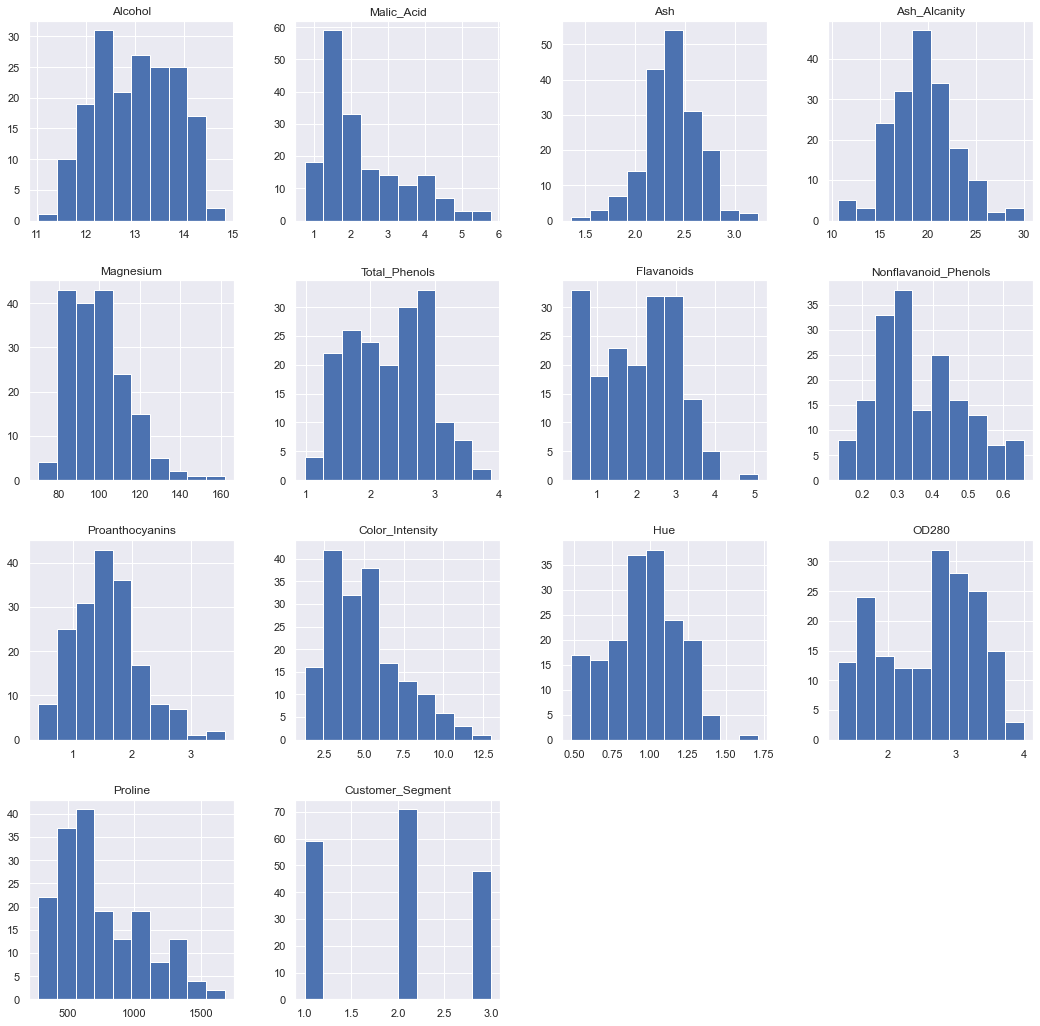

In [8]:
fig = raw_data.hist(figsize=(18, 18))

**3.5 Correlation**

**Q1) Compute and plot those feature which are related to each other?**

In [9]:
#check correlation
data = raw_data.copy()
data_num = data.drop('Customer_Segment', axis=1)
corr = data_num.corr()
corr

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

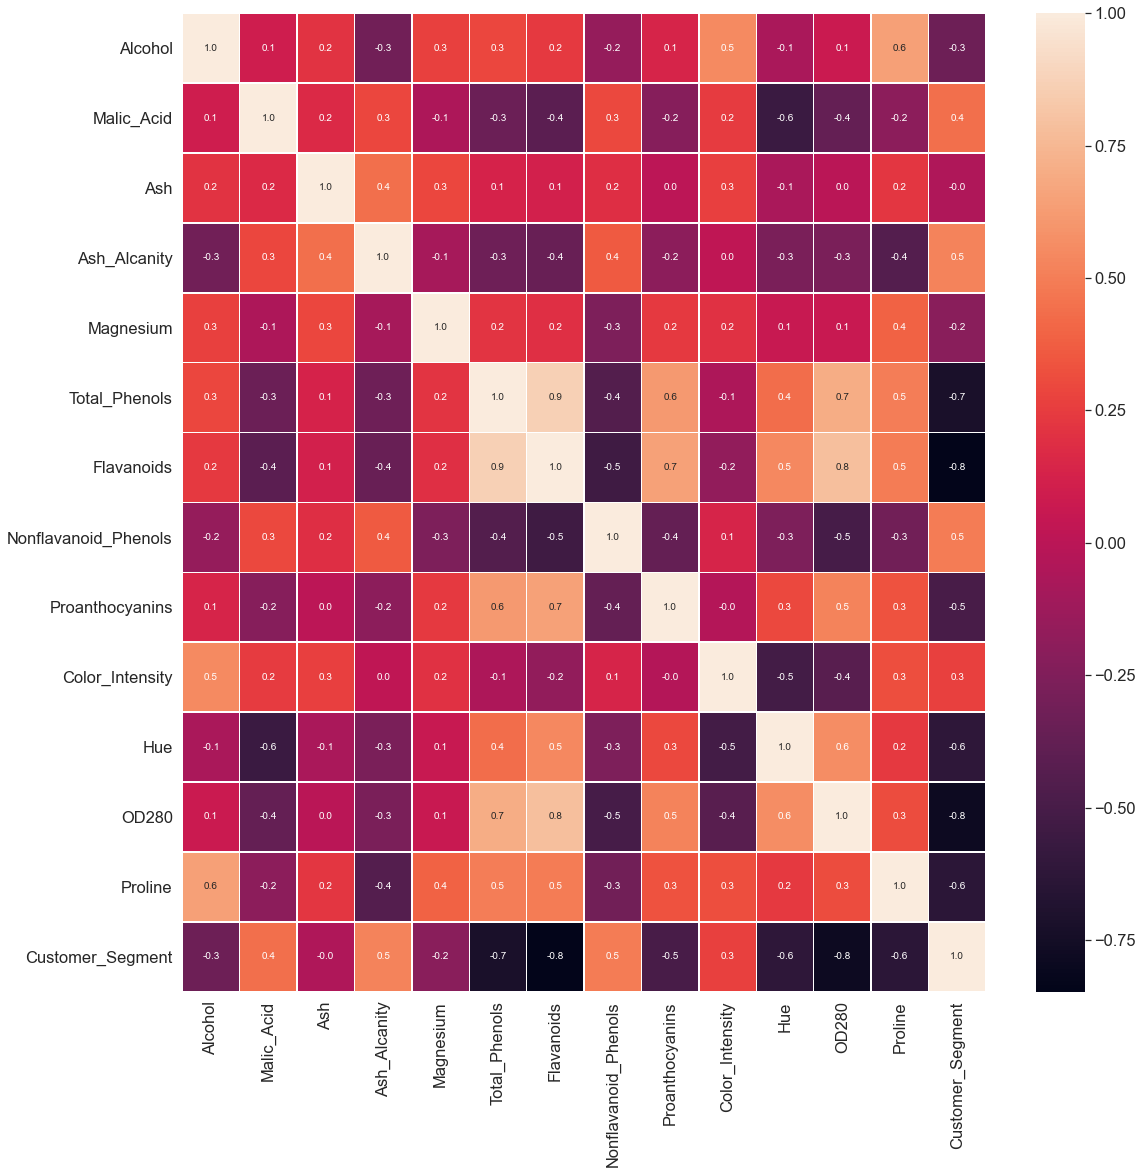

In [10]:
#correlatiom map
plt.figure(figsize=(18, 18))
sns.set(font_scale=1.5)
sns.heatmap(pd.DataFrame(raw_data).corr(), annot=True, linewidths=.5, fmt='.1f', annot_kws={'size': 10})

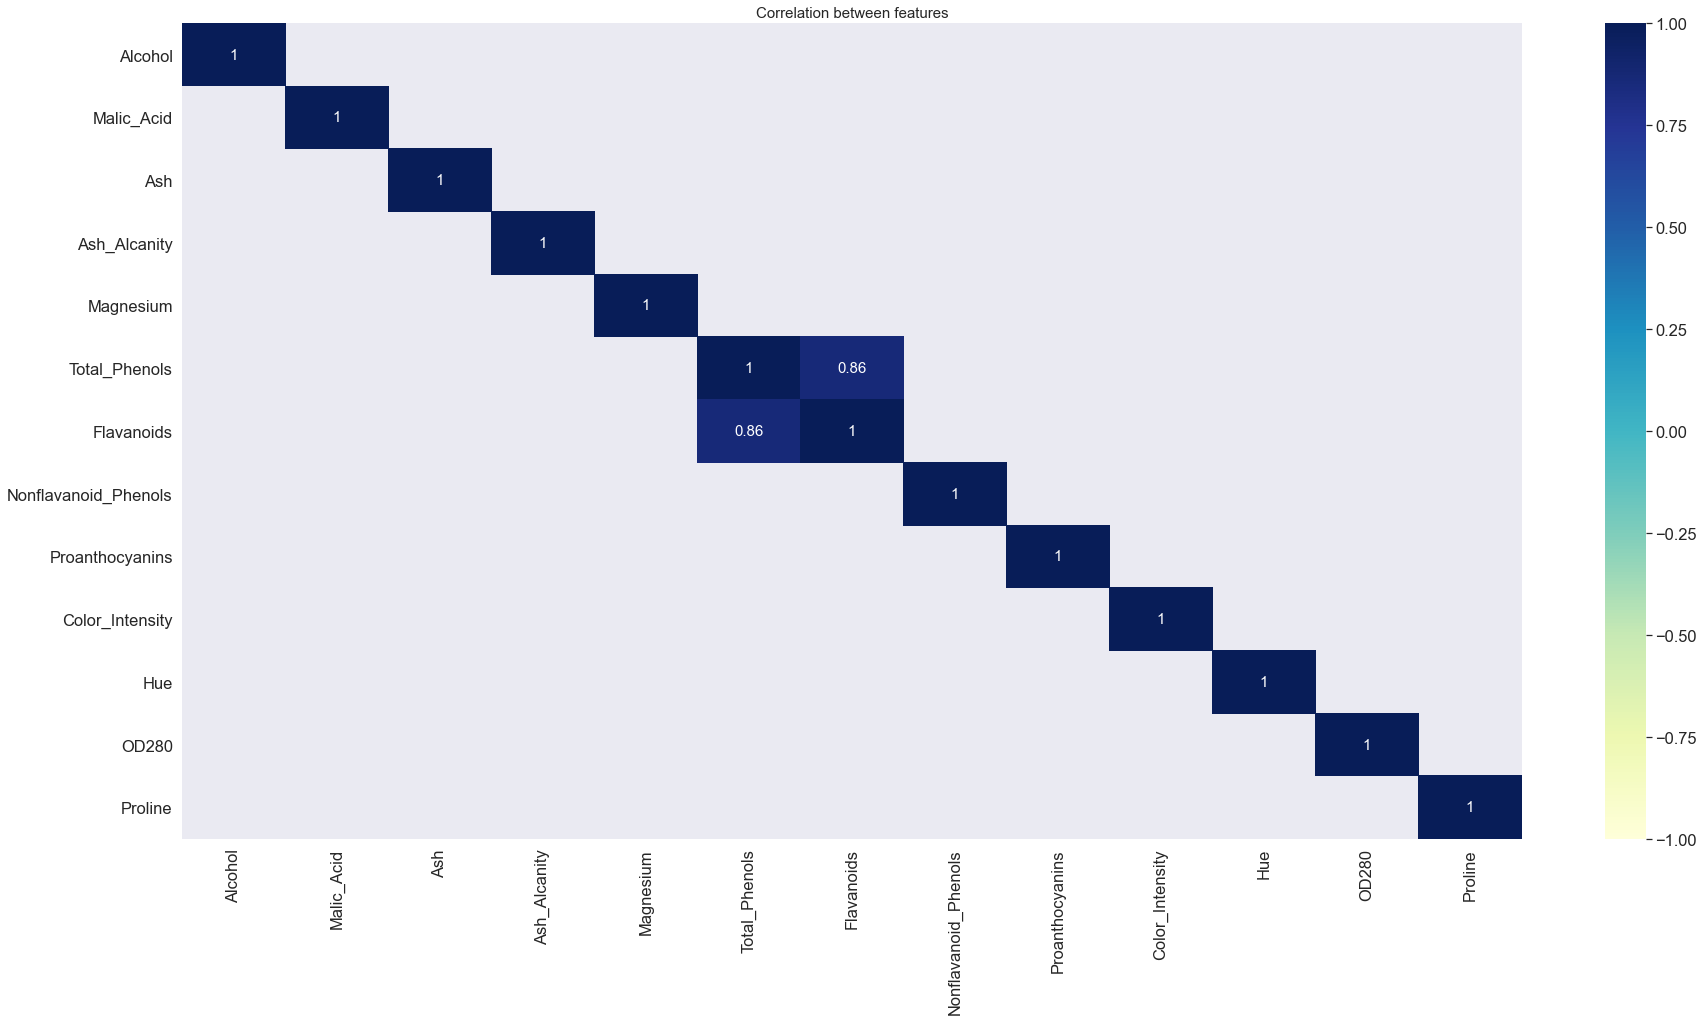

In [11]:
#plotting correlation plot
#set figure size
plt.figure(figsize=(30, 15))

#High correlation mostly taken >=0.7 & <= -0.9

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >=0.8) | (corr <= -0.9)], cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws={'size': 15})

#set the title
#fontsize=30 sets the font size of the title
plt.title('Correlation between features', fontsize=15)
#display the plot
plt.show()

Plotting related features

In [12]:
from sklearn import preprocessing
Input_Data = raw_data.copy()
Flavanoids = Input_Data['Flavanoids'].to_list()
Total_Phenols = Input_Data['Total_Phenols'].to_list()
Flavanoids_Normalized = preprocessing.normalize([Flavanoids], norm='max')[0]
Total_Phenols_Normalized = preprocessing.normalize([Total_Phenols], norm='max')[0]
FlavanoidsMean = np.array(Flavanoids_Normalized).mean()
Total_PhenolsMean = np.array(Total_Phenols_Normalized).mean()

#Python provides the preprocessing library, which contains the normalize function to normalize the
#data. It takes an array in as an input and normalizes its values between 0 and 1. It then returns
#an output array with the same dimensions as the input.
#norm['L1', 'L2', 'max'], default='L2'
#The norm to use to normalize each non zero sample

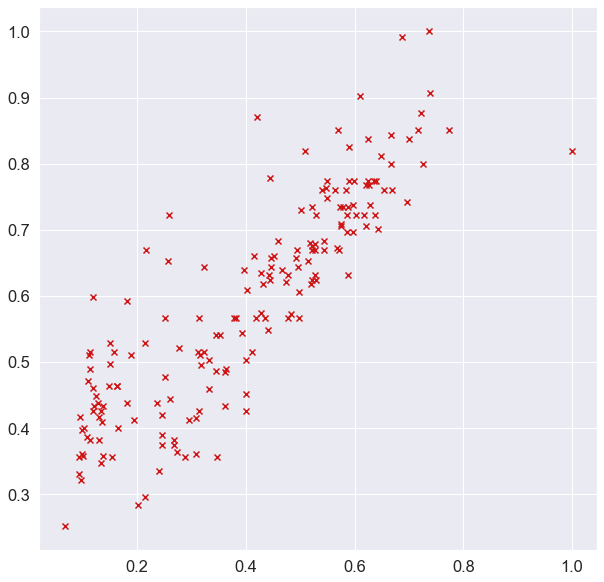

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(Flavanoids_Normalized, Total_Phenols_Normalized, marker='x', color='#ce1414')
plt.show()

### 4. Dimensionality Reduction

**Q2) What are the optimum number of principal components in PCA?**

In [14]:
#'StandardScaler', 'MinMaxScaler' are from sklearn.preprocessing module is used to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#'eig' from numpy.linalg to calculate eigen values & eigen vectors
from numpy.linalg import eig

#'PCA' function to perform Pricipal Component Analysis using sklearn library
from sklearn.decomposition import PCA

### 1st Way

**4.1 Prepare the Data**

In [15]:
X = raw_data.drop('Customer_Segment', axis=1)
y = raw_data['Customer_Segment']

**4.2 Scale the Data**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
data_rescaled = scaler.fit_transform(X)

**4.3 PCA**

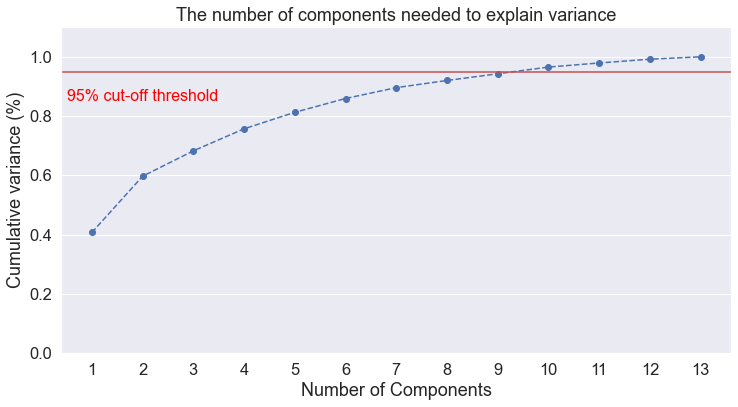

In [17]:
pca = PCA().fit(data_rescaled)

plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0, 1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()
#cumsum(): function returns the cumulative sum of the elements along the given axis.
#axhline(): Add a horizontal line across the axis.

In [18]:
pca = PCA(n_components=9)
pca.fit(X)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['Component_' + str(i) for i in range(1, 10)])
principalDf

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843
...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468


### 2nd Way

**4.1 Prepare the Data**

In [19]:
# Select the numerical variables and store it as 'df_numerical_features'
df_numerical_features = data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop the target variable from 'df_numerical_features'
# use 'drop' function to drop entire column
df_num = df_numerical_features.drop(['Customer_Segment'], axis=1)

# head() to display top 5 rows
df_num.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**4.2 Scale the Data**

In [20]:
#fit_transform() transforms the data by first computing the mean and sd & later scaling the data
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


**4.3 Covariance Matrix**

In [21]:
# generate the covariance matric using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first 5 observations with [0:5]
print(cov_mat[0:5])

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]]


**4.4 Compute Eigenvalues and Eigenvectors**

In [22]:
# use 'eig' function to compute Eigenvalues and Eigenvectors of the covariance vectors
eig_val, eig_vec = np.linalg.eig(cov_mat)

**4.5 Decide the Number of Principal Components**

In [23]:
# Eigenvalues greater than 1
# create the list of eigenvalues
eig_val = list(eig_val)

#'sort(reverse=True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse=True)
print(eig_val)

[4.732436977583596, 2.511080929645121, 1.454241867846466, 0.9241658668248728, 0.8580486765371104, 0.6452822124678541, 0.5541414662457824, 0.3504662749462536, 0.2905120326939768, 0.2523200103608247, 0.22706428173088505, 0.1697237389801212, 0.10396199182075325]


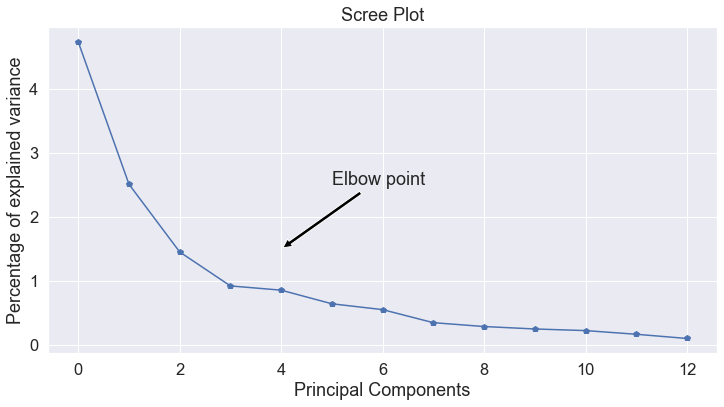

In [24]:
# Scree plot
# 'bp' represents blue color & pentagonal shape of points
plt.plot(eig_val, 'bp')

# plot a line plot
plt.plot(eig_val)

# label the x-axis
plt.xlabel('Principal Components')

# label the y-axis
plt.ylabel('Percentage of explained variance')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text='Elbow point', xy=(4, 1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle='simple'))

# title of the plot
plt.title("Scree Plot")

plt.show()

**4.6 PCA**

In [25]:
# specify required no. of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=4, random_state=0)

# fit_transform() computes the principal components
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [26]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(PrincipalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# head() to display top 5 rows
PCA_df.head()

,PC1,PC2,PC3,PC4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766


### 5. Model Building

**A. Using 1st way of principal components to implement Model Building**

In [27]:
scaler = MinMaxScaler()
scaler.fit(principalDf)
X = scaler.fit_transform(principalDf)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(ac)
print(cm)

1.0
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


**Getting 5 best features using RFE (Recursive Feature Elimination) Technique**

In [32]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)
print('Num Features: %s' % (fit.n_features_))
print('Selected Features: %s' % (fit.support_))
print('Feature Ranking: %s' % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True  True  True  True False False False]
Feature Ranking: [1 5 1 1 1 1 2 3 4]


**Q3) Build a KNN classifier considering optimal number of principal components and value of K and state its score.**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

for k in [3, 4, 5, 6]:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    #accuracy measures by classification_report()
    result = classification_report(y_test, y_pred)

    #print the result
    print('K: ', k)
    print(result)
    print()

K:  3
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       0.95      0.90      0.93        21
           3       0.92      0.79      0.85        14

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54


K:  4
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      0.90      0.90        21
           3       0.86      0.86      0.86        14

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54


K:  5
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       0.93      0.93      0.93        14



Since the accuracy for all k value is constant we will select 5 for random

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

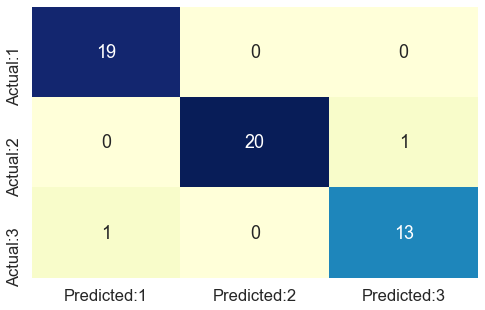

In [35]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_KNN)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [36]:
#accuracy measures by classification_report()
result = classification_report(y_test, y_pred_KNN)

#print the result
print(result)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       0.93      0.93      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [38]:
from sklearn import metrics
#create the result table for all accuracy scores

#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'
cols = ['Model', 'Accuracy Score']

#creating an empty dataframe of the columns
result_tabulations = pd.DataFrame(columns=cols)

#compiling the required information
KNN = pd.Series({
    'Model': 'KNN',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_KNN)
})

#appending our result table
result_tabulations = result_tabulations.append(KNN, ignore_index=True)

#view the result table
result_tabulations

,Model,Accuracy Score
0,KNN,0.962963


**Q4) Build a SVM Classifier and tune the hyperparameters to get the optimum model.**

In [39]:
#Initializing Support Vector Machine and fitting the training data
from sklearn.svm import SVC
#rbf
svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm1 = svm_rbf.predict(X_test)

#accuracy measures by classification_report()
result1 = classification_report(y_test, y_pred_svm1)

print('rbf: ')
print(result1)

#linear
svm_linear = SVC(kernel='linear', random_state=1)
svm_linear.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm2 = svm_linear.predict(X_test)

#accuracy measures by classification_report()
result2 = classification_report(y_test, y_pred_svm2)

print('linear: ')
print(result2)

#poly
svm_linear = SVC(kernel='poly', random_state=1)
svm_linear.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm3 = svm_linear.predict(X_test)

#accuracy measures by classification_report()
result3 = classification_report(y_test, y_pred_svm3)

print('poly: ')
print(result3)

rbf: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

linear: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

poly: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      0.95      0.95        21
           3       0.93      0.93      0.93        14

We will choose 'linear' kernel, Since the resullt for kernel 'linear' has highest accuracy.

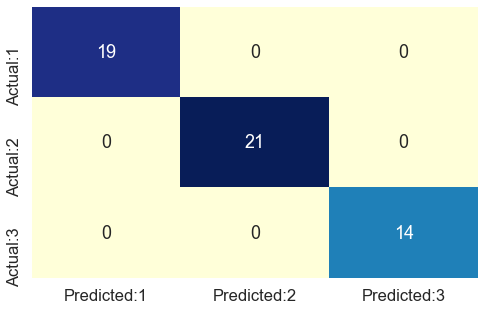

In [40]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm2)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [41]:
#create the result table for all accuracy scores
#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'

#compiling the required information
svm_metrics = pd.Series({
    'Model': 'SVM',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_svm2)
})

#appending our result table
result_tabulations = result_tabulations.append(svm_metrics, ignore_index=True)

#view the result table
result_tabulations

,Model,Accuracy Score
0,KNN,0.962963
1,SVM,1.000000


**Q5) Build a Naive Bayes Classifier and comment about its accuracy.**

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

#build the model
gnb = GaussianNB()

#define the ovr strategy
GNB = OneVsRestClassifier(gnb)

#One-vs-the-rest (OvR) multiclass strategy
#Most commonly used strategy for multiclass classification

#fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [43]:
#predict the values
y_pred_GNB = GNB.predict(X_test)

result = classification_report(y_test, y_pred_GNB)

#accuracy measures by classification_report()
print(result)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



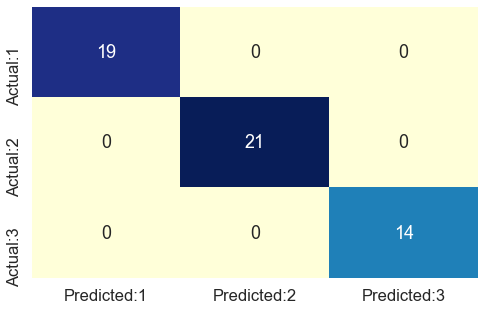

In [44]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_GNB)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [45]:
#create the result table for all accuracy scores
#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'

#compiling the required information
gnb_metrics = pd.Series({
    'Model': 'Naive Bayes',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB)
})

#appending our result table
result_tabulations = result_tabulations.append(gnb_metrics, ignore_index=True)

#view the result table
result_tabulations

,Model,Accuracy Score
0,KNN,0.962963
1,SVM,1.000000
2,Naive Bayes,1.000000


**B. Using 2nd way of principal components to implement Model Building**

**Q3) Build a KNN classifier considering optimal number of principal components and value of K and state its score.**

In [46]:
data1 = pd.concat([PCA_df, data['Customer_Segment']], axis=1)
data1.head()

,PC1,PC2,PC3,PC4,Customer_Segment
0,3.316751,-1.443463,-0.165739,-0.215631,1
1,2.209465,0.333393,-2.026457,-0.291358,1
2,2.516740,-1.031151,0.982819,0.724902,1
3,3.757066,-2.756372,-0.176192,0.567983,1
4,1.008908,-0.869831,2.026688,-0.409766,1


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data1.drop('Customer_Segment', axis=1)
y = data1['Customer_Segment']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45) 

In [49]:
for k in [3, 4, 5, 6]:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    #accuracy measures by classification_report()
    result = classification_report(y_test, y_pred)

    #print the result
    print('K: ', k)
    print(result)
    print()

K:  3
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        20

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


K:  4
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


K:  5
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        20



Since the accuracy for all k value is constant we will select 5 for random

In [50]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

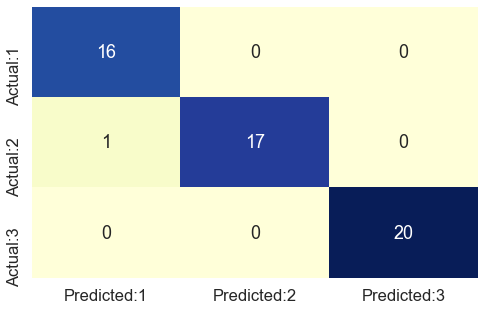

In [51]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_KNN)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [52]:
#accuracy measures by classification_report()
result = classification_report(y_test, y_pred_KNN)

#print the result
print(result)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [53]:
from sklearn import metrics
#create the result table for all accuracy scores

#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'
cols = ['Model', 'Accuracy Score']

#creating an empty dataframe of the columns
result_tabulation = pd.DataFrame(columns=cols)

#compiling the required information
KNN = pd.Series({
    'Model': 'KNN',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_KNN)
})

#appending our result table
result_tabulation = result_tabulation.append(KNN, ignore_index=True)

#view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.981481


**Q4) Build a SVM Classifier and tune the hyperparameters to get the optimum model.**

In [54]:
#Initializing Support Vector Machine and fitting the training data
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm1 = svm_rbf.predict(X_test)

#accuracy measures by classification_report()
result1 = classification_report(y_test, y_pred_svm1)

print('rbf: ')
print(result1)

rbf: 
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [55]:
svm_linear = SVC(kernel='linear', random_state=1)
svm_linear.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm2 = svm_linear.predict(X_test)

#accuracy measures by classification_report()
result2 = classification_report(y_test, y_pred_svm2)

print('linear: ')
print(result2)

linear: 
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [56]:
svm_poly = SVC(kernel='poly', random_state=1)
svm_poly.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm3 = svm_poly.predict(X_test)

#accuracy measures by classification_report()
result3 = classification_report(y_test, y_pred_svm3)

print('poly: ')
print(result3)

poly: 
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       0.78      1.00      0.88        18
           3       1.00      0.95      0.97        20

    accuracy                           0.91        54
   macro avg       0.93      0.90      0.90        54
weighted avg       0.93      0.91      0.91        54



In [57]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=1)
svm_sigmoid.fit(X_train, y_train)

#Predicting the classes for test set
y_pred_svm4 = svm_sigmoid.predict(X_test)

#accuracy measures by classification_report()
result4 = classification_report(y_test, y_pred_svm4)

print('sigmoid: ')
print(result4)

sigmoid: 
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       1.00      0.83      0.91        18
           3       0.95      1.00      0.98        20

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



In [58]:
print('rbf: ', metrics.accuracy_score(y_test, y_pred_svm1))
print('sigmoid: ', metrics.accuracy_score(y_test, y_pred_svm2))

rbf:  0.9814814814814815
sigmoid:  0.9814814814814815


Since the resullt for kernel 'rbf' and 'linear' are same we can choose any of the 2 kernels.

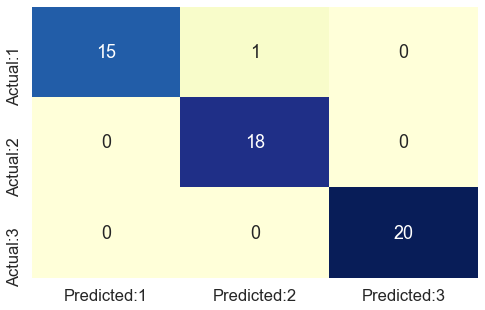

In [59]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm1)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [60]:
#create the result table for all accuracy scores
#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'

#compiling the required information
svm_metrics = pd.Series({
    'Model': 'SVM',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_svm1)
})

#appending our result table
result_tabulation = result_tabulation.append(svm_metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.981481
1,SVM,0.981481


**Q5) Build a Naive Bayes Classifier and comment about its accuracy.**

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

#build the model
gnb = GaussianNB()

#define the ovr strategy
GNB = OneVsRestClassifier(gnb)

#One-vs-the-rest (OvR) multiclass strategy
#Most commonly used strategy for multiclass classification

#fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [62]:
#predict the values
y_pred_GNB = GNB.predict(X_test)

result = classification_report(y_test, y_pred_GNB)

#accuracy measures by classification_report()
print(result)

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.90      1.00      0.95        18
           3       1.00      1.00      1.00        20

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



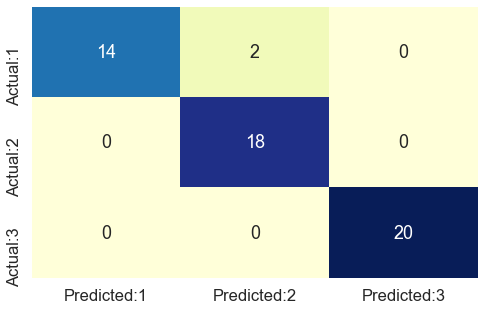

In [63]:
#compute the confusion_matrix
cm = confusion_matrix(y_test, y_pred_GNB)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:1', 'Predicted:2', 'Predicted:3'], index=['Actual:1', 'Actual:2', 'Actual:3'])

#set size of the plot
plt.figure(figsize=(8, 5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.show()

In [64]:
#create the result table for all accuracy scores
#Accuracy measures considered for model comparison are 'Model', 'Accuracy Score'

#compiling the required information
gnb_metrics = pd.Series({
    'Model': 'Naive Bayes',
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB)
})

#appending our result table
result_tabulation = result_tabulation.append(gnb_metrics, ignore_index=True)

#view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.981481
1,SVM,0.981481
2,Naive Bayes,0.962963


### 6. Model Comparison

**Q6) Compare all of the models and justify your choice about the optimum model.**

**A. 1st Model Building results**

In [65]:
result_tabulation

,Model,Accuracy Score
0,KNN,0.981481
1,SVM,0.981481
2,Naive Bayes,0.962963


From the above accuracy table, it can be seen from the result tabulation, that accuracy measures for the  SVM, KNN  Model are better than Naive bayes Model. Hence, the optimal choice can be either of SVM and KNN.

**B. 2nd Model Building results**

In [66]:
result_tabulations

,Model,Accuracy Score
0,KNN,0.962963
1,SVM,1.000000
2,Naive Bayes,1.000000


From the above accuracy table, it can be seen from the result tabulation, that accuracy measures for the  SVM, Naive bayes Model are better than KNN Model. Hence, the optimal choice can be either of SVM and Naive Bayes.